In [1]:
#%% Imports
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment
import cv2 as cv


import matplotlib.pyplot as plt
import seaborn as sns


from scipy.optimize import linear_sum_assignment
from scipy.spatial import distance_matrix


%config InlineBackend.figure_format = 'svg'
sns.set()

In [22]:
# %% Loading dataframe from new and old result
#df = pd.read_hdf('../data/testing_data/clement/old_combined.hdf', 'data')
df = pd.read_hdf('../tests/clement/df_batch_0.hdf', key='df')

In [23]:
# %% Names are different apparently so we need to rename them, only used for old stuff
df = df.rename(columns={'X (in pixel)': 'x', 'Y (in pixel)': 'y'}) #renaming columns
df = df[['frame', 'ID', 'x', 'y']]

df = df.sort_values(by=['frame', 'ID'], ignore_index=True)

In [26]:
n_flies = df.ID.unique().size

237.61873060180355


Text(0.5, 0, 'Position change')

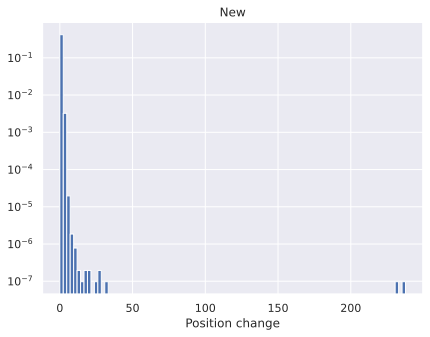

In [31]:
change= np.sum(np.diff(df_new[['x', 'y']].to_numpy().reshape(-1, n_flies, 2), axis=0)**2, axis=2)**(1/2)

print(np.max(change))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(change.flatten(), bins=100, log=True, density=True)
plt.title('New')
plt.xlabel('Position change')

That's much too high, let's do the manual tracking.

In [56]:
frame = 5365
dist = distance_matrix(df.query(f'frame == {frame}')[['x', 'y']].to_numpy(), 
                    df.query(f'frame == {frame + 1}')[['x', 'y']].to_numpy())
linear_sum_assignment(dist)[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [63]:
assignments = [linear_sum_assignment(distance_matrix(df.query(f'frame == {frame}')[['x', 'y']].to_numpy(), 
                    df.query(f'frame == {frame + 1}')[['x', 'y']].to_numpy()))[1] for frame in np.arange(99, 1000)]

In [64]:
assignments

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15

In [ ]:
class Hungarian:
    def __call__(self, coordinates_i, coordinates_j):
        identities_j = linear_sum_assignment(
            distance_matrix(coordinates_i, coordinates_j)
        )[1].squeeze()
        return identities_j